In [84]:
!pip install colorama

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install gym[toy_text]

In [3]:
import gym
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
env = gym.make("Taxi-v3").env

/usr/local/lib/python3.8/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


Action Space Discrete(6)
State Space Discrete(500)


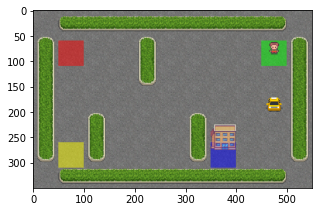

In [5]:
env.reset() 
fig = plt.figure(figsize = (5,5))
plt.imshow(env.render(mode='rgb_array'))
print("Action Space {}".format(env.action_space))
print("State Space {}".format(env.observation_space))

In [25]:
#@title Hyperparameters
REPS = 20
EPISODES = 2000
EPSILON = 1
LEARNING_RATE = 0.1
DISCOUNT = 0.9
STUDENT_NUM = 367

PROB = 0
ACTION = 1
STATE = 2
REWARD = 3

window_size = 50

In [ ]:
#@title Fully-Random Agent
class Fully_Random_Agent():

  def __init__(self,Enivronment,Repeats = REPS,episodes = EPISODES):
    
    self.Enivronment = Enivronment
    self.Repeats = Repeats
    self.Episodes = episodes

    self.nA = self.Enivronment.action_space.n
    self.nS = self.Enivronment.observation_space.n

  def Fully_Random(self):

    rewards = np.zeros(self.Episodes)
    steps = np.zeros(self.Episodes)
    reward_per_step = np.zeros(self.Episodes)
    for current_episode in range(self.Episodes):

      state = self.Enivronment.reset()
      finish = False
      episode_rewards = 0
      step_count = 0
      while(True):

        action = self.Enivronment.action_space.sample()

        next_state , reward , finish , possible_actions = self.Enivronment.step(action)

        state = next_state

        episode_rewards += reward

        step_count += 1

        if(finish == True): break

      rewards[current_episode] = episode_rewards
      steps[current_episode] = step_count
      reward_per_step[current_episode] = episode_rewards / step_count

    return rewards,steps,reward_per_step

In [37]:
#@title Q-Learning Agent

class Q_Learning_Agent():

  def __init__(self,Enivronment,Repeats = REPS,episodes = EPISODES,Epsilon = EPSILON,Learning_rate = LEARNING_RATE,Discount = DISCOUNT):
    
    self.Enivronment = Enivronment
    self.Repeats = Repeats
    self.Episodes = episodes
    self.Epsilon = Epsilon 
    self.Learning_rate = Learning_rate
    self.Discount = Discount

    self.nA = self.Enivronment.action_space.n
    self.nS = self.Enivronment.observation_space.n
    self.Q_values = np.zeros((self.nS,self.nA))

  def choose_action(self,state):
    prob = np.random.uniform(0,1)
    if(prob < self.Epsilon):
      action = self.Enivronment.action_space.sample()
    else:
      action = np.argmax(self.Q_values[state,:])
    return action


  def update_Q(self,state,action,next_state,reward):
    self.Q_values[state,action] = self.Q_values[state,action] + self.Learning_rate*(reward + self.Discount*np.max(self.Q_values[next_state,:]) - self.Q_values[state,action]) 


  def Q_learning(self):

    rewards = np.zeros(self.Episodes)
    steps = np.zeros(self.Episodes)
    reward_per_step = np.zeros(self.Episodes)
    for current_episode in range(self.Episodes):

      state = self.Enivronment.reset()
      finish = False
      episode_rewards = 0
      step_count = 0
      while(True):

        action = self.choose_action(state)

        next_state , reward , finish , possible_actions = self.Enivronment.step(action)

        self.update_Q(state,action,next_state,reward)

        state = next_state

        episode_rewards += reward

        step_count += 1

        if(finish == True): break

      self.Epsilon = np.exp(-0.01*current_episode)

      self.Learning_rate = np.exp(-0.001*current_episode)


      rewards[current_episode] = episode_rewards
      steps[current_episode] = step_count
      reward_per_step[current_episode] = episode_rewards / step_count

    return rewards,steps,reward_per_step


  def Routing_with_Updated_Q_Values(self):

    state = self.Enivronment.reset()
    finish = False
    actions = []
    while(True):

      fig = plt.figure(figsize = (5,5))
      plt.imshow(env.render(mode='rgb_array'))
      action = np.argmax(self.Q_values[state,:])
      next_state , reward , finish , possible_actions = self.Enivronment.step(action)
      state = next_state
      if(finish == True): break
      actions.append(action)

    return actions

  def Q_Learning_algorithm(self):
    Average_reward = np.zeros(self.Episodes)
    Average_step = np.zeros(self.Episodes)
    Average_reward_per_step = np.zeros(self.Episodes)
    for i in range(self.Repeats):
      rewards,steps,reward_per_step = self.Q_learning()
      Average_reward = Average_reward + 1/self.Repeats * rewards
      Average_step = Average_step + 1/self.Repeats * steps
      Average_reward_per_step = Average_reward_per_step + 1/self.Repeats * reward_per_step
    return Average_reward,Average_step,Average_reward_per_step

In [136]:
#@title Q-learning Agent with Different Rewards

class Q_Learning_Agent_dr():

  def __init__(self,Enivronment,Repeats = REPS,episodes = EPISODES,Epsilon = EPSILON,Learning_rate = LEARNING_RATE,Discount = DISCOUNT):
    
    self.Enivronment = Enivronment
    self.Repeats = Repeats
    self.Episodes = episodes
    self.Epsilon = Epsilon 
    self.Learning_rate = Learning_rate
    self.Discount = Discount

    self.nA = self.Enivronment.action_space.n
    self.nS = self.Enivronment.observation_space.n
    self.Q_values = np.zeros((self.nS,self.nA))

  def choose_action(self,state):
    prob = np.random.uniform(0,1)
    if(prob < self.Epsilon):
      action = self.Enivronment.action_space.sample()
    else:
      action = np.argmax(self.Q_values[state,:])
    return action


  def update_Q(self,state,action,next_state,reward):
    self.Q_values[state,action] = self.Q_values[state,action] + self.Learning_rate*(reward + self.Discount*np.max(self.Q_values[next_state,:]) - self.Q_values[state,action]) 


  def Q_learning(self):

    rewards = np.zeros(self.Episodes)
    steps = np.zeros(self.Episodes)
    reward_per_step = np.zeros(self.Episodes)
    for current_episode in range(self.Episodes):

      state = self.Enivronment.reset()
      finish = False
      episode_rewards = 0
      step_count = 0
      while(True):

        action = self.choose_action(state)

        next_state , reward , finish , possible_actions = self.Enivronment.step(action)


        pass_row , pass_col , pass_idx , dest_idx = self.Enivronment.decode(next_state)
        if(pass_idx == 4):
          if(dest_idx == 0):
            if(([pass_row , pass_col] == [0,0]) or ([pass_row , pass_col] == [0,1]) or ([pass_row , pass_col] == [1,0]) or ([pass_row , pass_col] == [1,1])):
              reward = -0.1
          if(dest_idx == 1):
            if(([pass_row , pass_col] == [0,3]) or ([pass_row , pass_col] == [1,3]) or ([pass_row , pass_col] == [1,4]) or ([pass_row , pass_col] == [0,4])):
              reward = -0.1
          if(dest_idx == 2):
            if(([pass_row , pass_col] == [2,0]) or ([pass_row , pass_col] == [3,0]) or ([pass_row , pass_col] == [4,0])):
              reward = -0.1
          if(dest_idx == 3):
            if(([pass_row , pass_col] == [3,3]) or ([pass_row , pass_col] == [3,4]) or ([pass_row , pass_col] == [4,4]) or ([pass_row , pass_col] == [4,3])):
              reward = -0.1

        if(([pass_row , pass_col] == [2,1]) or ([pass_row , pass_col] == [3,1]) or ([pass_row , pass_col] == [4,1]) or ([pass_row , pass_col] == [0,2]) or ([pass_row , pass_col] == [1,2])or([pass_row , pass_col] == [2,2])or([pass_row , pass_col] == [3,2])or([pass_row , pass_col] == [4,2])):
          if(reward == -10):
            reward = -20



        self.update_Q(state,action,next_state,reward)

        state = next_state

        episode_rewards += reward

        step_count += 1

        if(finish == True): break

      self.Epsilon = np.exp(-0.01*current_episode)
      self.Learning_rate = np.exp(-0.001*current_episode)


      rewards[current_episode] = episode_rewards
      steps[current_episode] = step_count
      reward_per_step[current_episode] = episode_rewards / step_count
    return rewards,steps,reward_per_step


  def Routing_with_Updated_Q_Values(self):

    state = self.Enivronment.reset()
    finish = False
    actions = []
    while(True):

      fig = plt.figure(figsize = (5,5))
      plt.imshow(env.render(mode='rgb_array'))
      action = np.argmax(self.Q_values[state,:])
      next_state , reward , finish , possible_actions = self.Enivronment.step(action)
      state = next_state
      if(finish == True): break
      actions.append(action)

    return actions

  def Q_Learning_algorithm(self):
    Average_reward = np.zeros(self.Episodes)
    Average_step = np.zeros(self.Episodes)
    Average_reward_per_step = np.zeros(self.Episodes)
    for i in range(self.Repeats):
      rewards,steps,reward_per_step = self.Q_learning()
      Average_reward = Average_reward + 1/self.Repeats * rewards
      Average_step = Average_step + 1/self.Repeats * steps
      Average_reward_per_step = Average_reward_per_step + 1/self.Repeats * reward_per_step
    return Average_reward,Average_step,Average_reward_per_step

## Testing the Fully-Random Agent

In [ ]:
f = Fully_Random_Agent(env)

In [ ]:
Average_reward_f,Average_step_f,Average_reward_per_step_f = f.Fully_Random()

Text(0, 0.5, 'average reward per step')

<Figure size 432x288 with 0 Axes>

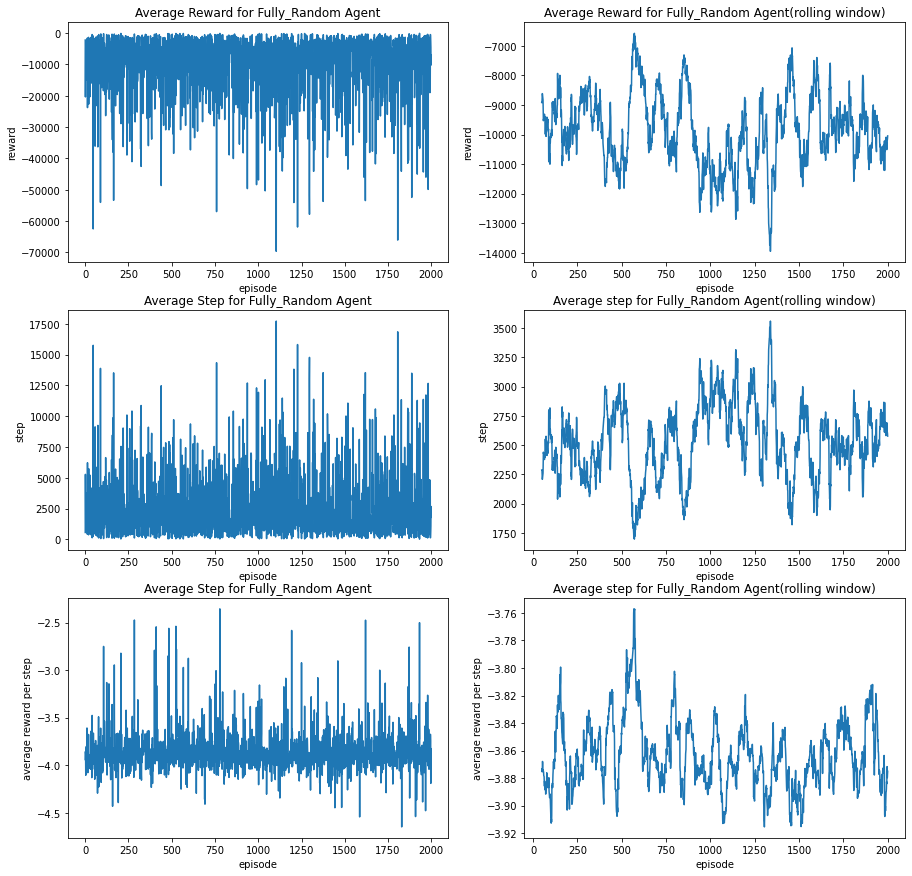

In [ ]:
smoothed_Average_reward_f = pd.Series(Average_reward_f).rolling(window_size , min_periods = window_size).mean()
smoothed_Average_step_f = pd.Series(Average_step_f).rolling(window_size , min_periods = window_size).mean()
smoothed_Average_reward_per_step_f = pd.Series(Average_reward_per_step_f).rolling(window_size , min_periods = window_size).mean()

plt.figure(1)
plt.figure(figsize=(15, 15))
plt.subplot(321)
plt.plot(Average_reward_f)
plt.title("Average Reward for Fully_Random Agent")
plt.xlabel("episode")
plt.ylabel("reward")
plt.subplot(322)
plt.plot(smoothed_Average_reward_f)
plt.title("Average Reward for Fully_Random Agent(rolling window)")
plt.xlabel("episode")
plt.ylabel("reward")
plt.subplot(323)
plt.plot(Average_step_f)
plt.title("Average Step for Fully_Random Agent")
plt.xlabel("episode")
plt.ylabel("step")
plt.subplot(324)
plt.plot(smoothed_Average_step_f)
plt.title("Average step for Fully_Random Agent(rolling window)")
plt.xlabel("episode")
plt.ylabel("step")
plt.subplot(325)
plt.plot(Average_reward_per_step_f)
plt.title("Average Step for Fully_Random Agent")
plt.xlabel("episode")
plt.ylabel("average reward per step")
plt.subplot(326)
plt.plot(smoothed_Average_reward_per_step_f)
plt.title("Average step for Fully_Random Agent(rolling window)")
plt.xlabel("episode")
plt.ylabel("average reward per step")

## Testing the Q-learning Agent

In [38]:
q = Q_Learning_Agent(env)

In [39]:
Average_reward,Average_step,Average_reward_per_step = q.Q_Learning_algorithm()

Text(0, 0.5, 'average reward per step')

<Figure size 432x288 with 0 Axes>

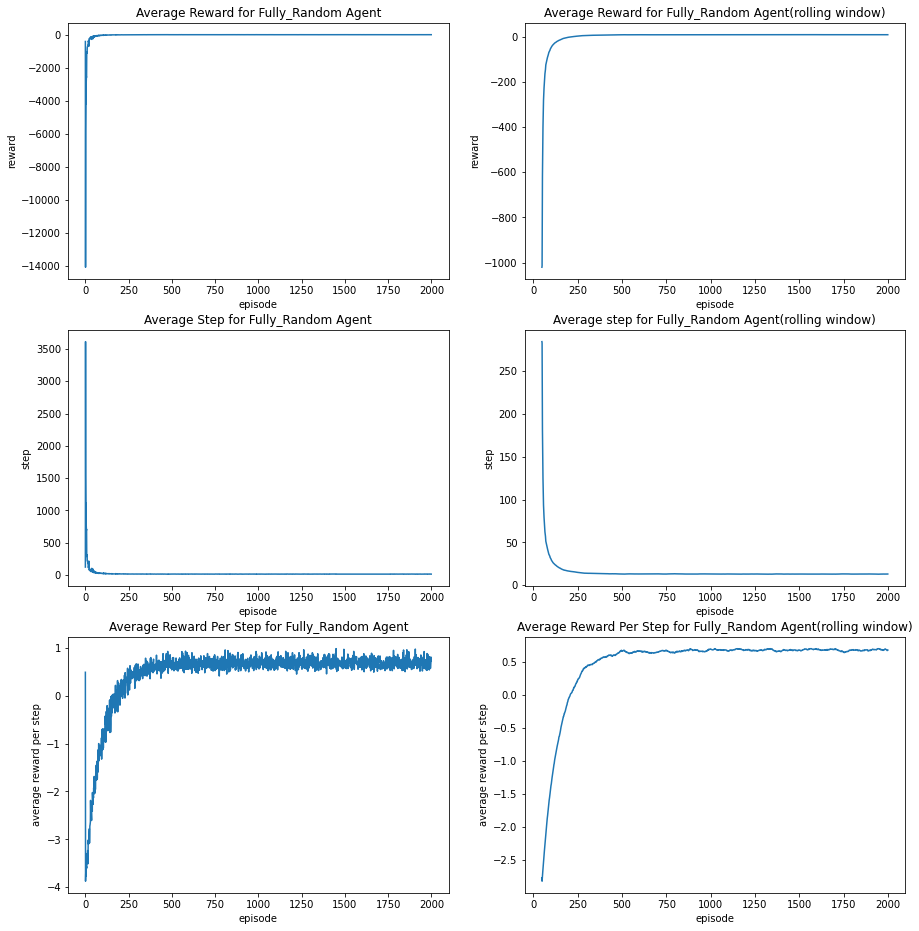

In [40]:
smoothed_Average_reward = pd.Series(Average_reward).rolling(window_size , min_periods = window_size).mean()
smoothed_Average_step = pd.Series(Average_step).rolling(window_size , min_periods = window_size).mean()
smoothed_Average_reward_per_step = pd.Series(Average_reward_per_step).rolling(window_size , min_periods = window_size).mean()

plt.figure(1)
plt.figure(figsize=(15, 16))
plt.subplot(321)
plt.plot(Average_reward)
plt.title("Average Reward for Fully_Random Agent")
plt.xlabel("episode")
plt.ylabel("reward")
plt.subplot(322)
plt.plot(smoothed_Average_reward)
plt.title("Average Reward for Fully_Random Agent(rolling window)")
plt.xlabel("episode")
plt.ylabel("reward")
plt.subplot(323)
plt.plot(Average_step)
plt.title("Average Step for Fully_Random Agent")
plt.xlabel("episode")
plt.ylabel("step")
plt.subplot(324)
plt.plot(smoothed_Average_step)
plt.title("Average step for Fully_Random Agent(rolling window)")
plt.xlabel("episode")
plt.ylabel("step")
plt.subplot(325)
plt.plot(Average_reward_per_step)
plt.title("Average Reward Per Step for Fully_Random Agent")
plt.xlabel("episode")
plt.ylabel("average reward per step")
plt.subplot(326)
plt.plot(smoothed_Average_reward_per_step)
plt.title("Average Reward Per Step for Fully_Random Agent(rolling window)")
plt.xlabel("episode")
plt.ylabel("average reward per step")

In [ ]:
q.Routing_with_Updated_Q_Values()

In [43]:
print(f'Q-Learning Average reward in last 100 episodes: {np.round(np.mean(Average_reward[1900:-1]),3)}')

Q-Learning Average reward in last 100 episodes: 7.99


## Testing Q-learning Agent with Different Rewards 

In [137]:
qdr = Q_Learning_Agent_dr(env)

In [141]:
Average_reward_dr,Average_step_dr,Average_reward_per_step_dr = qdr.Q_Learning_algorithm()

Text(0, 0.5, 'average reward per step')

<Figure size 432x288 with 0 Axes>

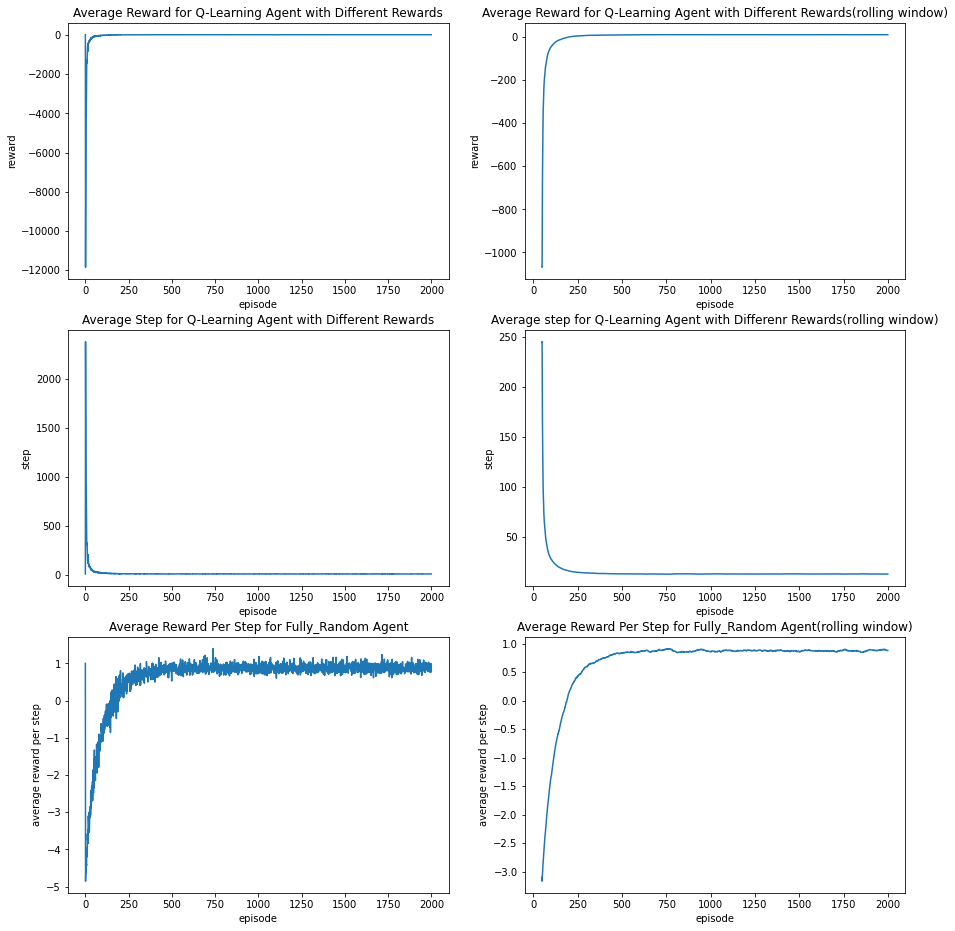

In [142]:
smoothed_Average_reward_dr = pd.Series(Average_reward_dr).rolling(window_size , min_periods = window_size).mean()
smoothed_Average_step_dr = pd.Series(Average_step_dr).rolling(window_size , min_periods = window_size).mean()
smoothed_Average_reward_per_step_dr = pd.Series(Average_reward_per_step_dr).rolling(window_size , min_periods = window_size).mean()

plt.figure(1)
plt.figure(figsize=(15, 16))
plt.subplot(321)
plt.plot(Average_reward_dr)
plt.title("Average Reward for Q-Learning Agent with Different Rewards")
plt.xlabel("episode")
plt.ylabel("reward")
plt.subplot(322)
plt.plot(smoothed_Average_reward_dr)
plt.title("Average Reward for Q-Learning Agent with Different Rewards(rolling window)")
plt.xlabel("episode")
plt.ylabel("reward")
plt.subplot(323)
plt.plot(Average_step_dr)
plt.title("Average Step for Q-Learning Agent with Different Rewards")
plt.xlabel("episode")
plt.ylabel("step")
plt.subplot(324)
plt.plot(smoothed_Average_step_dr)
plt.title("Average step for Q-Learning Agent with Differenr Rewards(rolling window)")
plt.xlabel("episode")
plt.ylabel("step")
plt.subplot(325)
plt.plot(Average_reward_per_step_dr)
plt.title("Average Reward Per Step for Fully_Random Agent")
plt.xlabel("episode")
plt.ylabel("average reward per step")
plt.subplot(326)
plt.plot(smoothed_Average_reward_per_step_dr)
plt.title("Average Reward Per Step for Fully_Random Agent(rolling window)")
plt.xlabel("episode")
plt.ylabel("average reward per step")

## Comparing Different Methods

<Figure size 432x288 with 0 Axes>

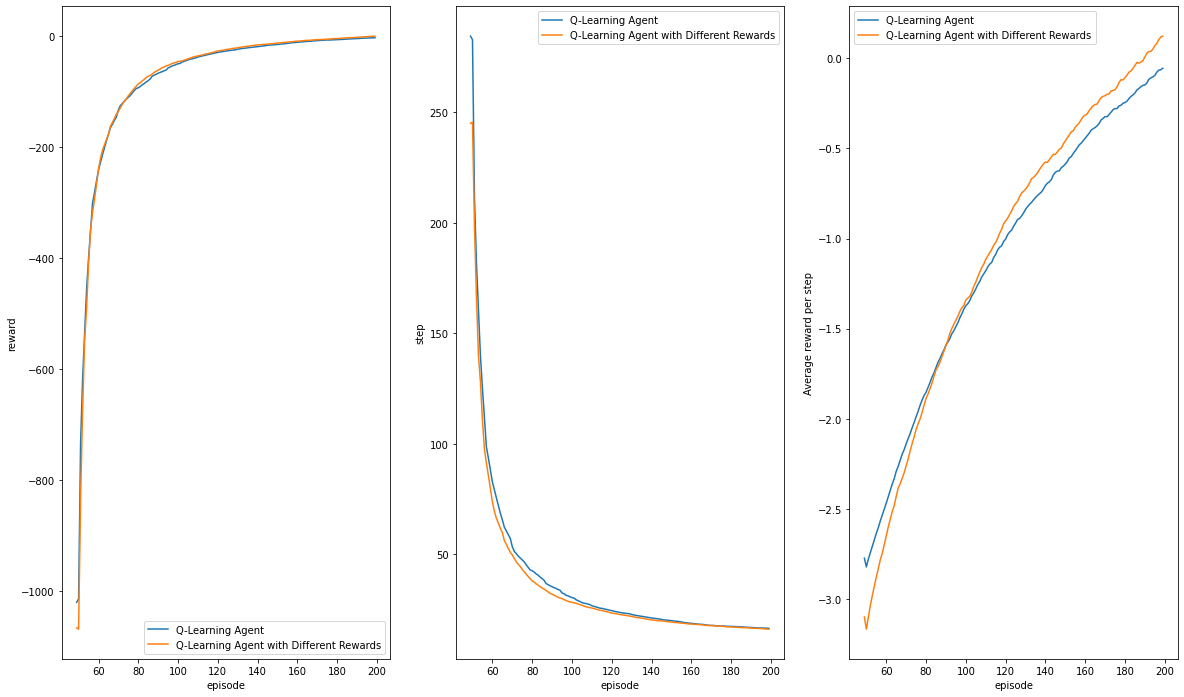

In [145]:
plt.figure(1)
plt.figure(figsize=(20, 12))
plt.subplot(131)
plt.plot(smoothed_Average_reward[:200],label = 'Q-Learning Agent')
plt.plot(smoothed_Average_reward_dr[:200], label = 'Q-Learning Agent with Different Rewards')
plt.xlabel("episode")
plt.ylabel("reward")
plt.legend()
plt.subplot(132)
plt.plot(smoothed_Average_step[:200],label = 'Q-Learning Agent')
plt.plot(smoothed_Average_step_dr[:200], label = 'Q-Learning Agent with Different Rewards')
plt.xlabel("episode")
plt.ylabel("step")
plt.legend()
plt.subplot(133)
plt.plot(smoothed_Average_reward_per_step[:200],label = 'Q-Learning Agent')
plt.plot(smoothed_Average_reward_per_step_dr[:200], label = 'Q-Learning Agent with Different Rewards')
plt.xlabel("episode")
plt.ylabel("Average reward per step")
plt.legend()
